In [7]:
import pandas as pd

df = pd.DataFrame(data={
    'edu_goal': ['bachelors', 'bachelors', 'bachelors', 'masters', 'masters', 'masters', 'masters', 'phd', 'phd', 'phd'],
    'hours_study': [1, 2, 3, 3, 3, 4, 3, 4, 5, 5],
    'hours_TV': [4, 3, 4, 3, 2, 3, 2, 2, 1, 1],
    'hours_sleep': [10, 10, 8, 8, 6, 6, 8, 8, 10, 10],
    'height_cm': [155, 151, 160, 160, 156, 150, 164, 151, 158, 152],
    'grade_level': [8, 8, 8, 8, 8, 8, 8, 8, 8, 8],
    'exam_score': [71, 72, 78, 79, 85, 86, 92, 93, 99, 100]
})

In [8]:
X = df.drop(columns=['exam_score'])

print(X)

    edu_goal  hours_study  hours_TV  hours_sleep  height_cm  grade_level
0  bachelors            1         4           10        155            8
1  bachelors            2         3           10        151            8
2  bachelors            3         4            8        160            8
3    masters            3         3            8        160            8
4    masters            3         2            6        156            8
5    masters            4         3            6        150            8
6    masters            3         2            8        164            8
7        phd            4         2            8        151            8
8        phd            5         1           10        158            8
9        phd            5         1           10        152            8


In [9]:
y = df['exam_score']

# Variance threshold
One of the most basic filter methods is to use a __variance threshold to remove any features that have little to no variation in their values__. This is because features with low variance do __not contribute much information__ to a model. Since variance can only be calculated on numeric values, this method __only works on quantitative features__. That said, we may also want to remove categorical features for which all or a majority of the values are the same. To do that, we would need to dummy code the categorical variables first, but we won’t demonstrate that here.

In [10]:
print(X.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   edu_goal     10 non-null     object
 1   hours_study  10 non-null     int64 
 2   hours_TV     10 non-null     int64 
 3   hours_sleep  10 non-null     int64 
 4   height_cm    10 non-null     int64 
 5   grade_level  10 non-null     int64 
dtypes: int64(5), object(1)
memory usage: 608.0+ bytes
None


In our example dataset, `edu_goal` is the only feature that is not numeric. We can use the `.drop()` method to remove it from our features DataFrame and store the remaining numeric features in X_num:

In [11]:
X_num = X.drop(columns=['edu_goal'])

print(X_num)

   hours_study  hours_TV  hours_sleep  height_cm  grade_level
0            1         4           10        155            8
1            2         3           10        151            8
2            3         4            8        160            8
3            3         3            8        160            8
4            3         2            6        156            8
5            4         3            6        150            8
6            3         2            8        164            8
7            4         2            8        151            8
8            5         1           10        158            8
9            5         1           10        152            8


Now, we’ll be able to use the VarianceThreshold class from scikit-learn to help remove the low-variance features from `X_num`. By default, it __drops all features with zero variance__, but we can adjust the threshold during class instantiation using the threshold parameter if we want to allow some variation. The `.fit_transform()` method returns the filtered features as a numpy array:

In [12]:
from sklearn.feature_selection import VarianceThreshold

selector = VarianceThreshold(threshold=0)  # 0 is default

print(selector.fit_transform(X_num))

[[  1   4  10 155]
 [  2   3  10 151]
 [  3   4   8 160]
 [  3   3   8 160]
 [  3   2   6 156]
 [  4   3   6 150]
 [  3   2   8 164]
 [  4   2   8 151]
 [  5   1  10 158]
 [  5   1  10 152]]


As we can see, grade_level was removed because there is no variation in its values — all students are 8th graders. 
Since this data is the same across the board, 
a student’s grade level will not be able to provide any useful predictive information about their exam score, 
so it makes sense to drop `grade_level` as a feature.

Something to note is that loading datasets with scikit-learn generally works with numpy arrays internally, 
hence the output type of `.fit_transform()`. 
However, the methods can also accept other data types that can be converted to numpy arrays, such as Python lists or pandas DataFrames, like the `X_num` we used. From a human perspective, one downside of working with numpy arrays as compared to pandas DataFrame is that we lose information like column headings, making the data harder to visually inspect.

Luckily, `VarianceThreshold` offers another method called `.get_support()` that can __return the indices__ of the selected features, which we can use to manually subset our numeric features DataFrame.

Specify `indices=True` to get indices of selected features:

In [13]:
print(selector.get_support(indices=True))

[0 1 2 3]


Use indices to get the corresponding column names of selected features:

In [14]:
num_cols = list(X_num.columns[selector.get_support(indices=True)])

print(num_cols)

['hours_study', 'hours_TV', 'hours_sleep', 'height_cm']


In [15]:
X_num = X_num[num_cols]

print(X_num)

   hours_study  hours_TV  hours_sleep  height_cm
0            1         4           10        155
1            2         3           10        151
2            3         4            8        160
3            3         3            8        160
4            3         2            6        156
5            4         3            6        150
6            3         2            8        164
7            4         2            8        151
8            5         1           10        158
9            5         1           10        152


Finally, to obtain our entire features DataFrame, including the categorical column `edu_goal`, we could do:

In [16]:
X = X[['edu_goal'] + num_cols]

print(X)

    edu_goal  hours_study  hours_TV  hours_sleep  height_cm
0  bachelors            1         4           10        155
1  bachelors            2         3           10        151
2  bachelors            3         4            8        160
3    masters            3         3            8        160
4    masters            3         2            6        156
5    masters            4         3            6        150
6    masters            3         2            8        164
7        phd            4         2            8        151
8        phd            5         1           10        158
9        phd            5         1           10        152


# Pearson’s correlation
Another type of filter method involves finding the correlation between variables. In particular, the Pearson’s correlation coefficient is useful for __measuring the linear relationship between two numeric, continuous variables__ — a coefficient close to 1 represents a positive correlation, -1 represents a negative correlation, and 0 represents no correlation. Like variance, Pearson’s correlation coefficient __cannot be calculated for categorical variables__. Although, there is a related point _biserial correlation coefficient_ that can be computed when one variable is _dichotomous_, but we won’t focus on that here.

There are _2 main ways of using correlation for feature selection_ — to __detect correlation between features__ and to __detect correlation between a feature and the target variable__.
## Correlation between features

When two features are highly correlated with one another, then keeping just one to be used in the model will be enough because otherwise they __provide duplicate information__. The second variable would only be redundant and serve to contribute unnecessary noise.

To determine which variables are correlated with one another, we can use the `.corr()` method from pandas to find the correlation coefficient between each pair of numeric features in a DataFrame. By default, `.corr()` computes the Pearson’s correlation coefficient, but alternative methods can be specified using the method parameter. We can visualize the resulting correlation matrix using a heatmap:

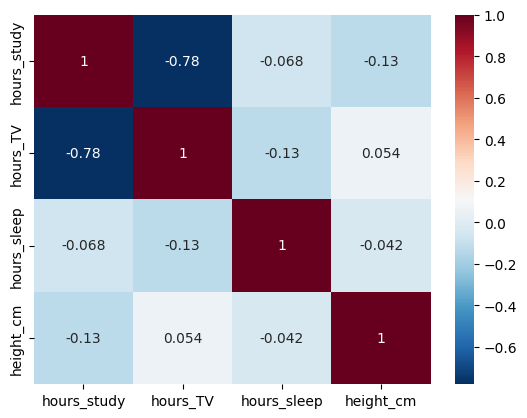

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

corr_matrix = X_num.corr(method='pearson')  # 'pearson' is default

sns.heatmap(corr_matrix, annot=True, cmap='RdBu_r')
plt.show()

Let’s define high correlation as having a coefficient of greater than 0.7 or less than -0.7. We can loop through the correlation matrix to identify the highly correlated variables:

In [19]:
# Loop over bottom diagonal of correlation matrix
for i in range(len(corr_matrix.columns)):
    for j in range(i):

        # Print variables with high correlation
        if abs(corr_matrix.iloc[i, j]) > 0.7:
            print(corr_matrix.columns[i], corr_matrix.columns[j], corr_matrix.iloc[i, j])

hours_TV hours_study -0.780763315142435


As seen, `hours_TV` appears to be __highly negatively correlated__ with `hours_study` — a student who watches a lot of TV tends to spend fewer hours studying, and vice versa. Because they provide redundant information, we can choose to remove one of those variables. To decide which one, we can look at their correlation with the target variable, then remove the one that is less associated with the target. This is explored in the next section.

# Correlation between feature and target
As mentioned, the second way correlation can be used is to __determine__ if there is __a relationship between a feature and the target variable__. In the case of Pearson’s correlation, this is especially __useful__ if we intend __to fit a linear model__, which assumes a linear relationship between the target and predictor variables. If a feature is not very correlated with the target variable, such as having a coefficient of between -0.3 and 0.3, then it may not be very predictive and can potentially be filtered out.

We can use the same `.corr()` method seen previously to obtain the correlation between the target variable and the rest of the features. First, we’ll need to create a new DataFrame containing the numeric features with the exam_score column:

In [20]:
X_y = X_num.copy()
X_y['exam_score'] = y

print(X_y)

   hours_study  hours_TV  hours_sleep  height_cm  exam_score
0            1         4           10        155          71
1            2         3           10        151          72
2            3         4            8        160          78
3            3         3            8        160          79
4            3         2            6        156          85
5            4         3            6        150          86
6            3         2            8        164          92
7            4         2            8        151          93
8            5         1           10        158          99
9            5         1           10        152         100


Then, we can generate the correlation matrix and isolate the column corresponding to the target variable to see how strongly each feature is correlated with it:

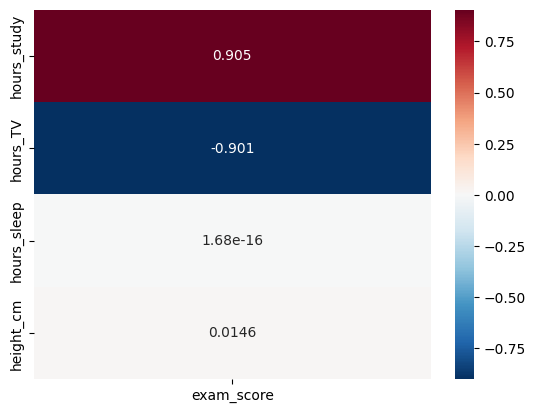

In [21]:
corr_matrix = X_y.corr()

# Isolate the column corresponding to `exam_score`
corr_target = corr_matrix[['exam_score']].drop(labels=['exam_score'])

sns.heatmap(corr_target, annot=True, fmt='.3', cmap='RdBu_r')
plt.show()

As seen, hours_study is positively correlated with `exam_score` and `hours_TV` is negatively correlated with it. It makes sense that `hours_study` and `hours_TV` would be negatively correlated with each other as we saw earlier, and just one of those features would suffice for predicting exam_score. Since `hours_study` has a stronger correlation with the target variable, let’s `remove hours_TV` as the redundant feature:

In [22]:
X = X.drop(columns=['hours_TV'])

print(X)

    edu_goal  hours_study  hours_sleep  height_cm
0  bachelors            1           10        155
1  bachelors            2           10        151
2  bachelors            3            8        160
3    masters            3            8        160
4    masters            3            6        156
5    masters            4            6        150
6    masters            3            8        164
7        phd            4            8        151
8        phd            5           10        158
9        phd            5           10        152


The other two features, `hours_sleep` and `height_cm`, both do __not seem to be correlated with `exam_score`__, suggesting they would not be very good predictors. We could potentially remove either or both of them as being uninformative. But before we do, it is a good idea to use other methods to double check that the features truly are not predictive. We will do that in the next section by using __mutual information__ _to see if there are any non-linear associations between the features and target variable_.

To conclude this section, we’ll briefly note an alternative approach for assessing the correlation between variables. Instead of generating the full correlation matrix, we could use the `f_regression()` function from `scikit-learn` to find the __F-statistic__ for a model with each predictor on its own. The F-statistic will be larger (and p-value will be smaller) for predictors that are more highly correlated with the target variable, thus it will perform the same filtering:

In [23]:
from sklearn.feature_selection import f_regression

print(f_regression(X_num, y))


(array([3.61362007e+01, 3.44537037e+01, 0.00000000e+00, 1.70259066e-03]), array([3.19334945e-04, 3.74322763e-04, 1.00000000e+00, 9.68097878e-01]))


The function returns the `F-statistic` in the __first array__ and the `p-value` in the __second__. As seen, the result is consistent with what we had observed in the correlation matrix — __the stronger the correlation__ (either positive or negative) between the feature and target, the __higher the corresponding F-statistic and lower the p-value__. For example, amongst all the features, `hours_study` has the largest correlation coefficient (0.905), highest F-statistic (3.61e+01), and lowest p-value (3.19e-04).

# Mutual information
The _final filter method_ we’ll look at is using mutual information to __rank and select the top features__. Mutual information is a __measure of dependence between two variables__ and can be _used to gauge how much a feature contributes to the prediction of the target variable_. It is _similar to Pearson’s correlation_, but is _not limited to detecting linear associations_. This makes mutual information useful for _more flexible models where a linear functional form is not assumed_. Another advantage of mutual information is that it also __works on discrete features or target__, _unlike correlation_. Although, __`categorical` variables need to be numerically encoded first__.

In our example, we can encode the `edu_goal` column using the `LabelEncoder` class from `scikit-learn`‘s `preprocessing` module:

In [24]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# Create copy of `X` for encoded version
X_enc = X.copy()
X_enc['edu_goal'] = le.fit_transform(X['edu_goal'])

print(X_enc)

   edu_goal  hours_study  hours_sleep  height_cm
0         0            1           10        155
1         0            2           10        151
2         0            3            8        160
3         1            3            8        160
4         1            3            6        156
5         1            4            6        150
6         1            3            8        164
7         2            4            8        151
8         2            5           10        158
9         2            5           10        152


Now, we can compute the mutual information between each feature and `exam_score` using `mutual_info_regression()`. __This function is used because our target variable is continuous__, but _if we had a discrete target variable, we would use `mutual_info_classif()`_. We specify the `random_state` in the function in order obtain `reproducible` results:

In [27]:
from sklearn.feature_selection import mutual_info_regression

print(mutual_info_regression(X_enc, y, random_state=68))

[0.50396825 0.40896825 0.         0.        ]


The estimated mutual information between each feature and the target is returned in a numpy array, where each value is a non-negative number — __the higher the value, the more predictive power is assumed__.

However, we are missing one more important piece here. Earlier, even though we encoded `edu_goal` to be numeric, that does not mean it should be treated as a continuous variable. In other words, the values of `edu_goal` are still discrete and should be interpreted as such. If we plot `edu_goal` against `exam_score` on a graph, we can clearly see the steps between the values of `edu_goal`:

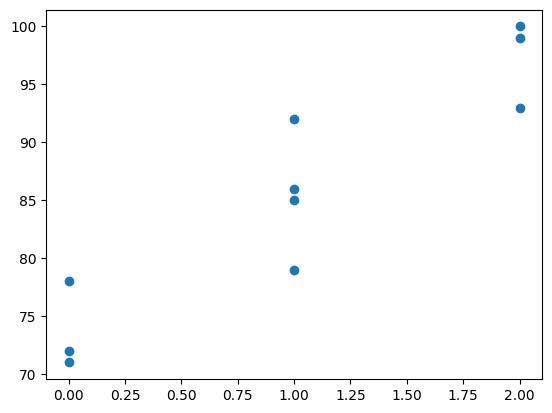

In [32]:
plt.scatter(X_enc['edu_goal'], y)
plt.show()

In order to properly calculate the mutual information, we need to tell `mutual_info_regression()` which features are discrete by providing their index positions using the `discrete_features` parameter:

In [28]:
print(mutual_info_regression(X_enc, y, discrete_features=[0], random_state=68))


[0.75563492 0.38896825 0.11896825 0.        ]


Compared to the earlier results, we now get greater mutual information between `edu_goal` and the target variable once it is __correctly interpreted as a discrete feature__.

From the results, we can also see that there is 0 mutual information between `height_cm` and `exam_score`, suggesting that these variables are largely independent. This is consistent with what we saw earlier with Pearson’s correlation, where the correlation coefficient between them is very close to 0 as well.

What is interesting to note is that __the mutual information__ between `hours_sleep` and `exam_score` is a __positive value__, even though their Pearson’s correlation coefficient is 0. The answer becomes more clear when we plot the relationship between `hours_sleep` and `exam_score`:

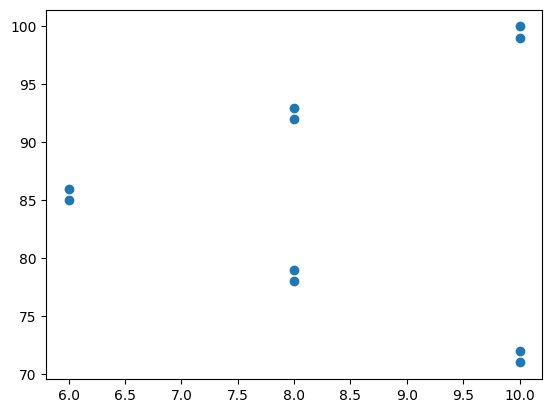

In [31]:
plt.scatter(X_enc['hours_sleep'], y)
plt.show()

As seen, there do seem to be __some association between the variables__, only it is __not a linear__ one, which is why it was __detected using mutual information but not Pearson’s correlation coefficient__.

Finally, let’s look at using the `SelectKBest` class from `scikit-learn` to help __pick out the top k features with the highest ranked__ scores. In our case, we are looking to select __features__ that share __the most mutual information with the target variable__. When we instantiate `SelectKBest`, we’ll specify which __scoring function to use__ and __how many top features to select__. Here, our scoring function is `mutual_info_regression()`, but because we want to specify additional arguments besides the X and y inputs, we’ll need the help of the `partial()` function from Python’s built-in functools module. Then, the `.fit_transform()` method will return the filtered features as a numpy array:

In [33]:
from sklearn.feature_selection import SelectKBest
from functools import partial

score_func = partial(mutual_info_regression, discrete_features=[0], random_state=68)

# Select top 3 features with the most mutual information
selection = SelectKBest(score_func=score_func, k=3)

print(selection.fit_transform(X_enc, y))

[[ 0  1 10]
 [ 0  2 10]
 [ 0  3  8]
 [ 1  3  8]
 [ 1  3  6]
 [ 1  4  6]
 [ 1  3  8]
 [ 2  4  8]
 [ 2  5 10]
 [ 2  5 10]]


As seen above, we selected the __top 3 features based on mutual information__, thus __dropping height_cm__. Like `VarianceThreshold`, `SelectKBest` also offers the `.get_support()` method that returns the indices of the selected features, so we could subset our original features DataFrame:

In [34]:
X = X[X.columns[selection.get_support(indices=True)]]

print(X)

    edu_goal  hours_study  hours_sleep
0  bachelors            1           10
1  bachelors            2           10
2  bachelors            3            8
3    masters            3            8
4    masters            3            6
5    masters            4            6
6    masters            3            8
7        phd            4            8
8        phd            5           10
9        phd            5           10


# Conclusion
In our example dataset, we __started out with 6 features__ for predicting the `exam_score` of students. Using various filter methods, we narrowed down that set to just the top most relevant and informative ones. First, we eliminated `grade_level` because it has __zero variance and would contribute nothing__ to the model. Then, we __dropped__ `hours_TV` since it is __highly correlated with `hours_study`__ and is therefore __redundant__. Lastly, we __filtered out `height_cm` based on mutual information__, which suggested that it does __not have any meaningful association with the target variable__, _linear or otherwise_, and would not have been very predictive.